## HW2: Linear Discriminant Analysis
In hw2, you need to implement Fisher’s linear discriminant by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by calling sklearn.discriminant_analysis.LinearDiscriminantAnalysis 

## Load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 2)
(750,)
(250, 2)
(250,)


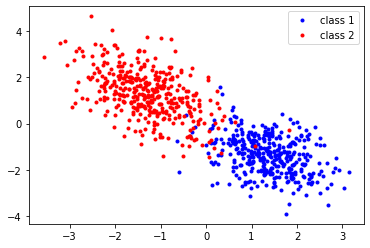

In [4]:
class1_x, class1_y, class2_x, class2_y = [], [], [], []

for i in range(len(x_train)):
    if y_train[i] == 0:
        class1_x.append(x_train[i][0])
        class1_y.append(x_train[i][1])
    else:
        class2_x.append(x_train[i][0])
        class2_y.append(x_train[i][1])

# Plot the data of each class
plt.plot(class1_x, class1_y, '.', color='blue', label='class 1')
plt.plot(class2_x, class2_y, '.', color='red', label='class 2')
plt.legend()

In [5]:
# Construct the data matrix of each class
class1_x_column_vector = np.array([class1_x]).T
class1_y_column_vector = np.array([class1_y]).T
class1 = np.concatenate((class1_x_column_vector, class1_y_column_vector), axis=1)
print(class1.shape)

class2_x_column_vector = np.array([class2_x]).T
class2_y_column_vector = np.array([class2_y]).T
class2 = np.concatenate((class2_x_column_vector, class2_y_column_vector), axis=1)
print(class2.shape)

(369, 2)
(381, 2)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [6]:
# Calculate the mean of each class
m1 = np.mean(class1, axis=0)
m2 = np.mean(class2, axis=0)

In [7]:
print(f"mean vector of class 1: {m1}", f"mean vector of class 2: {m2}")

mean vector of class 1: [ 1.3559426  -1.34746216] mean vector of class 2: [-1.29735587  1.29096203]


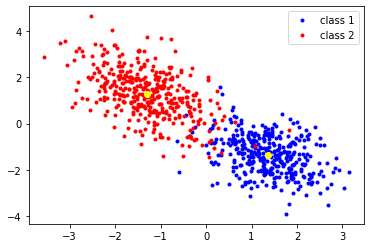

In [8]:
# Plot the mean of each class with yellow dot
plt.plot(class1_x, class1_y, '.', color='blue', label='class 1')
plt.plot(class2_x, class2_y, '.', color='red', label='class 2')
plt.plot(m1[0], m1[1], 'o', color='yellow')
plt.plot(m2[0], m2[1], 'o', color='yellow')
plt.legend()

## 2. Compute the Within-class scatter matrix SW

In [9]:
## same as np.cov(X[:,0], X[:,1])
# def calCovariance(X, mean):
#     """Calculate the covarance matrix of input data X
    
#     Arguments:
#     X -- input data
#     mean -- mean of X
#     """
#     row, col = X.shape
#     fact = row - 1
#     X = X - mean
#     S_k = np.dot(X.T, X.conj()) / fact
#     return S_k

In [10]:
def calWithinClassScatter(X, mk):
    """Calculate the Between-class scatter matrix of class_k

    Arguments:
    X -- the data in class_k
    mk -- the mean of class_k
    """
    N = X.shape[0]
    mk = np.array([mk, ] * N)
    x_minus_mk = X - mk
    x_minus_mk = x_minus_mk.T
    S = x_minus_mk @ x_minus_mk.T
    return S

In [11]:
s1 = calWithinClassScatter(class1, m1)
s2 = calWithinClassScatter(class2, m2)
sw = s1 + s2

In [12]:
assert sw.shape == (2,2)
print(f"Within-class scatter matrix SW:\n{sw}")

Within-class scatter matrix SW:
[[ 388.64001349 -228.92177708]
 [-228.92177708  665.56910433]]


## 3.  Compute the Between-class scatter matrix SB

In [13]:
def calBewteenClassScatter(N, mk, global_mean):
    """Calculate the Between-class scatter matrix of class_k

    Arguments:
    N -- the number of data in class_k
    mk -- the mean of data in class_k
    global_mean -- the mean of whole data(e.g. x_train)
    """
    mk_minus_m = np.array(mk - global_mean)
    mk_minus_m = mk_minus_m.reshape(-1, 1)  # the shape now becomes (2, 1)
    S_between = N * (mk_minus_m).dot(mk_minus_m.T)
    return S_between

In [14]:
N1 = class1.shape[0]
N2 = class2.shape[0]
global_mean = np.mean(x_train, axis=0)

s1_bwtween = calBewteenClassScatter(N1, m1, global_mean)
s2_between = calBewteenClassScatter(N2, m2, global_mean)
sb = s1_bwtween + s2_between

In [15]:
assert sb.shape == (2,2)
print(f"Between-class scatter matrix SB:\n{sb}")

Between-class scatter matrix SB:
[[ 1319.66072786 -1312.26276299]
 [-1312.26276299  1304.90627081]]


## 4. Compute the Fisher’s linear discriminant

In [16]:
M = np.dot(np.linalg.inv(sw), sb)
eigenvalues, eigenvectors = np.linalg.eig(M)
print(eigenvalues)
print(eigenvectors)
w = eigenvectors[:, 0].reshape(-1, 1)
print(w.shape)

[ 3.80416486e+00 -4.44089210e-16]
[[ 0.94096648  0.70511642]
 [-0.33849976  0.70909156]]
(2, 1)


In [17]:
assert w.shape == (2,1)
print(f" Fisher’s linear discriminant:\n{w}")

 Fisher’s linear discriminant:
[[ 0.94096648]
 [-0.33849976]]


## 5. Project the test data by linear discriminant to get the class prediction by nearest-neighbor rule and calculate the accuracy score 
you can use accuracy_score function from sklearn.metric.accuracy_score

In [18]:
# Project all training data into the one-dimensional space via w
y_train_projected = np.dot(x_train, w)

# Project all testing data into the one-dimensional space via w
y_pred = np.dot(x_test, w)

In [19]:
def findNearest(arr, val):
    # Find the element in array 'arr' which is closest to the scalar value 'val'
    idx = np.abs(arr - val).argmin()
    return idx, arr[idx]

In [20]:
y_pred_result = []
for i in range(len(y_pred)):
    index, value = findNearest(y_train_projected, y_pred[i])
    y_pred_result.append(y_train[index])

In [21]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred_result)

In [22]:
print(f"Accuracy of test-set {acc}")

Accuracy of test-set 0.916


## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

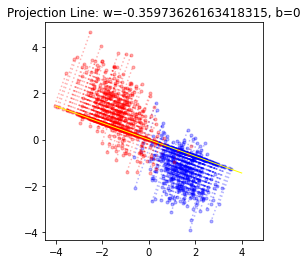

In [23]:
sol = w
slope = sol[1][0] / sol[0][0]  # slope = (y-y')/(x-x')
intercept = 0

# project data points of each class
r = sol.reshape(2,)
n2 = np.linalg.norm(r)**2
for pt in class1:
    prj = r * r.dot(pt) / n2
    plt.plot([prj[0], pt[0]], [prj[1], pt[1]], 'b.:', alpha=0.3)
for pt in class2:
    prj = r * r.dot(pt) / n2
    plt.plot([prj[0], pt[0]], [prj[1], pt[1]], 'r.:', alpha=0.3)

# draw projection line
plt.plot([-4, 4], [-4*slope, 4*slope], color='yellow', linewidth=1)
plt.title(f'Projection Line: w={slope}, b={intercept}')
plt.axis('square')
plt.show()